In [1]:
! mkdir ~/.kaggle

In [2]:
!mv ./kaggle.json  ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download -c 'asap-aes'

 72% 57.0M/78.8M [00:00<00:00, 77.6MB/s]
100% 78.8M/78.8M [00:00<00:00, 99.0MB/s]


In [8]:
!unzip asap-aes.zip -d ./dataset

Archive:  asap-aes.zip
  inflating: ./dataset/Essay_Set_Descriptions.zip  
  inflating: ./dataset/Training_Materials.zip  
  inflating: ./dataset/test_set.tsv  
  inflating: ./dataset/training_set_rel3.tsv  
  inflating: ./dataset/training_set_rel3.xls  
  inflating: ./dataset/training_set_rel3.xlsx  
  inflating: ./dataset/valid_sample_submission_1_column.csv  
  inflating: ./dataset/valid_sample_submission_1_column_no_header.csv  
  inflating: ./dataset/valid_sample_submission_2_column.csv  
  inflating: ./dataset/valid_sample_submission_5_column.csv  
  inflating: ./dataset/valid_set.tsv  
  inflating: ./dataset/valid_set.xls  
  inflating: ./dataset/valid_set.xlsx  


In [11]:
import pandas as pd

In [24]:
train_set = pd.read_csv("./dataset/training_set_rel3.tsv", sep="\t", encoding="ISO 8859-1")
test_set = pd.read_csv("./dataset/test_set.tsv", sep="\t", encoding="ISO 8859-1")
valid_set = pd.read_csv("./dataset/valid_set.tsv", sep="\t", encoding="ISO 8859-1")

In [27]:
all_essay = train_set["essay"].values.tolist() + test_set["essay"].values.tolist() + valid_set["essay"].values.tolist()

In [28]:
len(all_essay)

21448

In [ ]:
!pip install transformers

In [30]:
from transformers import GPT2Tokenizer

In [31]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [35]:
all_essay[0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the econom

In [32]:
tokens = [
    tokenizer.tokenize(i) for i in all_essay
]
len_tokens = [len(i) for i in tokens]

<BarContainer object of 1164 artists>

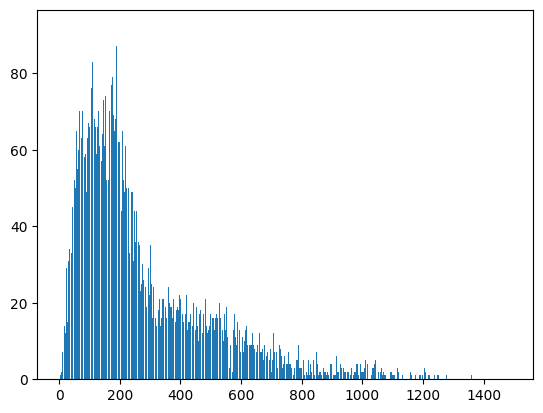

In [34]:
from collections import Counter
import matplotlib.pyplot as plt
ct = Counter(len_tokens)
plt.bar(ct.keys(), ct.values())

In [61]:
def extract_data(all_essay, tokenizer):
    new_essay = []
    for essay in all_essay:
        essay = essay.replace("\t", "").replace("\r", "").replace("\n", " ")
        tokens = tokenizer.tokenize(essay)
        if len(tokens) < 32:
            continue
        new_essay.append(essay)
    print(len(new_essay))
    print(len([i for i in new_essay if "\n" in i]))
    with open("./aes_data.txt", "w") as f:
        f.write("\n".join(new_essay))
        f.close()

In [62]:
extract_data(all_essay, tokenizer)

21107
0
